<span style="color:orange;font-size:20px"><b> Import </b></span><br>

In [13]:
# Base
import os, random, matplotlib, re

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Helper librariesyi0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from sklearn.model_selection import train_test_split

In [5]:
RANDOM_STATE = 1
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)
keras.utils.set_random_seed(RANDOM_STATE)

<span style="color:orange;font-size:20px"><b> Load Data </b></span><br>

In [16]:
pos = np.load('./Sweep_pos_swp.npy')
neg = np.load('./Sweep_neg_swp.npy')

In [17]:
data   = np.concatenate(( neg, pos ))
labels = np.concatenate(( np.zeros(500), np.ones(500) ))

<span style="color:orange;font-size:20px"><b> Check Data</b></span><br>

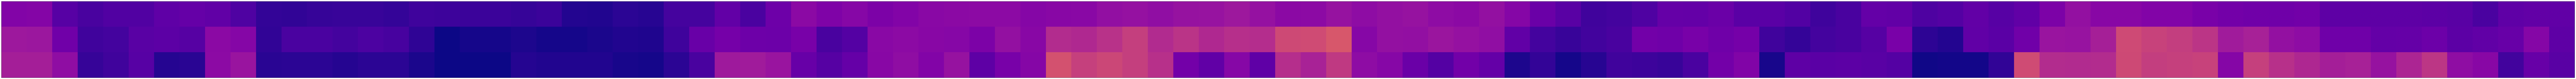

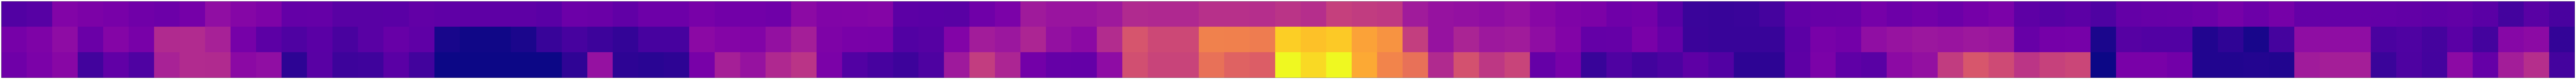

In [18]:
plt.figure(figsize=(250,25), facecolor='w')
plt.xticks([])
plt.yticks([])
plt.imshow(data[55].T, vmin = 0,vmax = 1, cmap='plasma')
plt.show()

plt.figure(figsize=(250,25), facecolor='w')
plt.xticks([])
plt.yticks([])
plt.imshow(data[555].T, vmin = 0,vmax = 1, cmap='plasma')
plt.show()

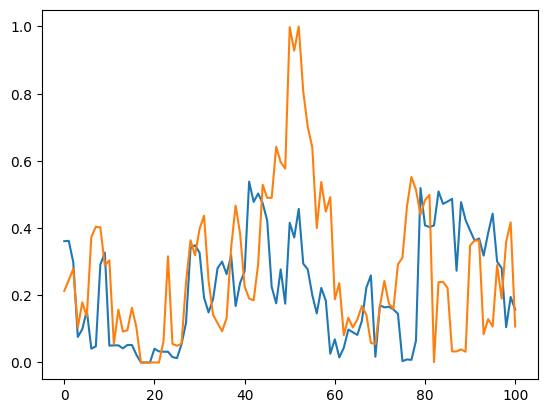

In [19]:
plt.plot(data[ 55, :, 2])
plt.plot(data[555, :, 2])

<span style="color:orange;font-size:20px"><b> Prepare Data </b></span><br>

In [20]:
r_ind      = np.random.permutation(1000)
shf_data   = data[r_ind]
shf_labels = labels[r_ind]

In [21]:
X_train, X_test, y_train, y_test = train_test_split( shf_data, shf_labels, test_size=0.2)

<span style="color:orange;font-size:20px"><b> Create ANN </b></span><br>

In [24]:
keras.backend.clear_session()

In [23]:
def build_model( num_layers, num_neurons):
    model = keras.Sequential()
    model.add( layers.Flatten(input_shape=(101, 3)) )

    for _ in range(int(num_layers)):
        model.add(layers.Dense(int(num_neurons), activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    optimizer = keras.optimizers.Adam()
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [25]:
model = build_model(1, 500)

history = model.fit( X_train, y_train,
                      epochs=100, shuffle = True, validation_split=0.2)

Epoch 1/100
20/20 [==============================] - 1s 13ms/step - loss: 0.3185 - accuracy: 0.8687 - val_loss: 0.1455 - val_accuracy: 0.9688
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1191 - accuracy: 0.9719 - val_loss: 0.0788 - val_accuracy: 0.9750
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0874 - accuracy: 0.9734 - val_loss: 0.0541 - val_accuracy: 0.9875
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0687 - accuracy: 0.9812 - val_loss: 0.0604 - val_accuracy: 0.9875
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0586 - accuracy: 0.9812 - val_loss: 0.0455 - val_accuracy: 0.9875
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0470 - accuracy: 0.9891 - val_loss: 0.0418 - val_accuracy: 0.9812
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0399 - accuracy: 0.9875 - val_loss: 0.0429 - val_accuracy: 0.9875
Epoch 8/100


In [28]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [29]:
y_pred

array([[9.9999285e-01],
       [9.9999893e-01],
       [5.1906447e-08],
       [9.9999958e-01],
       [9.9999994e-01],
       [9.9999899e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999988e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999988e-01],
       [9.6985255e-09],
       [4.6781409e-07],
       [5.8931242e-08],
       [1.0000000e+00],
       [1.0000000e+00],
       [5.0107528e-06],
       [1.0000000e+00],
       [3.1772412e-08],
       [1.0000000e+00],
       [1.0000000e+00],
       [3.0894724e-05],
       [9.9995238e-01],
       [3.8266095e-05],
       [1.0503830e-06],
       [9.9999988e-01],
       [6.3058728e-06],
       [9.1030153e-05],
       [5.1948251e-07],
       [9.9999970e-01],
       [4.9213753e-03],
       [1.7395325e-06],
       [9.9999899e-01],
       [7.8750491e-05],
       [3.4791401e-07],
       [2.6888046e-07],
       [9.9999982e-01],
       [5.8936945e-04],
       [9.399347

In [14]:
binary_pred = (y_pred >= 0.5).astype(int)

In [13]:
from sklearn.metrics import accuracy_score

In [15]:
# Assuming you have the true labels for your test data as y_test
accuracy = accuracy_score(y_test, binary_pred)
print("Accuracy:", accuracy)

Accuracy: 0.99


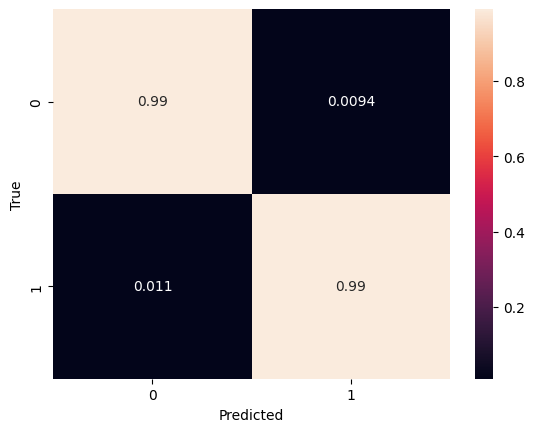

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(binary_pred, y_test)
sns.heatmap(cm/sum(cm), annot=True)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


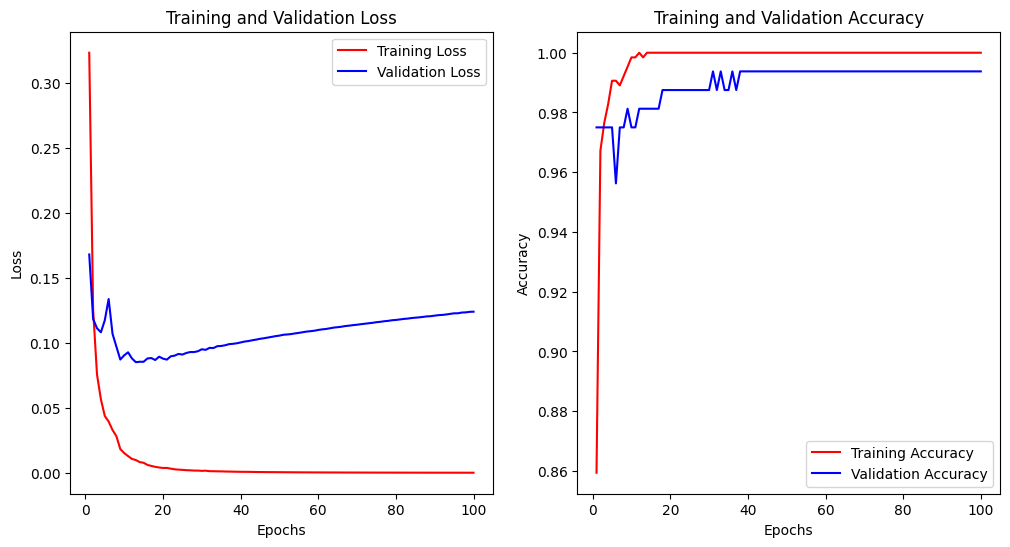

In [18]:
import matplotlib.pyplot as plt

# Access the training history
loss     = history.history['loss']
acc      = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc  = history.history['val_accuracy']
epochs   = range(1, 101)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

<span style="color:orange;font-size:20px"><b> Create DT </b></span><br>

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Create a Linear Regression model and train it
X_train, X_test, y_train, y_test = train_test_split( shf_data.reshape((1000, 101*3)), shf_labels, test_size=0.2)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.995


In [15]:
# Make predictions on the test set
y_pred = dt.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.995


<Axes: >

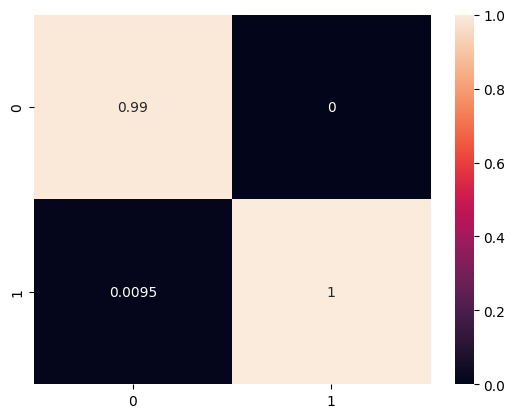

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm/sum(cm), annot=True)

[Text(0.6666666666666666, 0.875, 'x[152] <= 0.692\ngini = 0.5\nsamples = 800\nvalue = [395, 405]'),
 Text(0.5, 0.625, 'x[126] <= 0.004\ngini = 0.005\nsamples = 396\nvalue = [395, 1]'),
 Text(0.3333333333333333, 0.375, 'x[244] <= 0.1\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 392\nvalue = [392, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 404\nvalue = [0, 404]')]

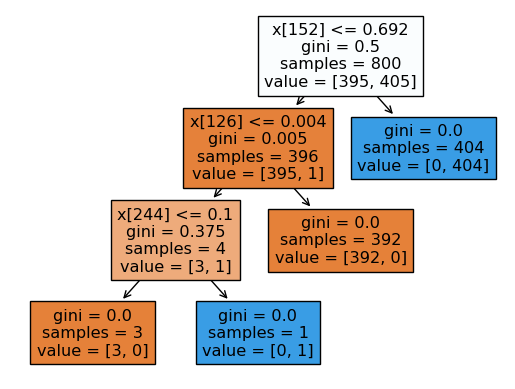

In [17]:
from sklearn.tree import plot_tree

plot_tree(dt, filled=True)